# Lab 01 - HỒI QUY

Nhập môn Học Máy

Giảng viên lý thuyết: TS Bùi Tiến Lên

Hướng dẫn thực hành: Nguyễn Tiến Huy

Nhóm 13:

18120009 - Vương Gia Bảo

18120045 - Ngô Xuân Kiên

18120061 - Lê Nhựt Nam (Nhóm trưởng)

18120167 - Nguyễn Viết Dũng

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1HqxL5ryBgznpgfXDxutYcsc_hSkAEqF5?usp=sharing) Click link này để mở Notebook trên môi trường Google Colab

# Chuẩn bị dữ liệu
Ở bước này, sử dụng wget để download hai tập tin ```train.csv``` và ```test.csv``` vào thư mục có tên là ```data```

Tập tin ```train.csv``` Là tập dữ liệu huấn luyện với các thông tin như:
- Age: Tuổi
- Sex: Giới tính
- BMI: Chỉ số khối cơ thể
- Children: Số lượng trẻ con/ người phụ thuộc
- Smoker: tình trạng hút thuốc
- Region: khu vực sinh sống
- Charges: Chi phí y tế cá nhân

In [1]:
!mkdir data # Tạo thư mục có tên là data
!cd data # cdir vào data
# download dữ liệu vào thư mục data
!wget "https://drive.google.com/uc?export=download&id=19ig1GFDCioN_O2LjhF_JSzhwl_erengT" -O data/train.csv
!wget "https://drive.google.com/uc?export=download&id=1xvHczHpMFgPIQhyMKWT__fHimq0yVVK9" -O data/test.csv

--2021-05-10 07:21:04--  https://drive.google.com/uc?export=download&id=19ig1GFDCioN_O2LjhF_JSzhwl_erengT
Resolving drive.google.com (drive.google.com)... 74.125.143.100, 74.125.143.101, 74.125.143.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.143.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t4m6spg5go16la5j6n2m227558sfmo3b/1620631200000/14788740065847059351/*/19ig1GFDCioN_O2LjhF_JSzhwl_erengT?e=download [following]
--2021-05-10 07:21:05--  https://doc-00-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t4m6spg5go16la5j6n2m227558sfmo3b/1620631200000/14788740065847059351/*/19ig1GFDCioN_O2LjhF_JSzhwl_erengT?e=download
Resolving doc-00-24-docs.googleusercontent.com (doc-00-24-docs.googleusercontent.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Connecting to doc-00-24-docs.googleusercontent.com (doc-0

# Import các thư viện cần thiết

In [2]:
from __future__ import division

# Thư viện hỗ trợ cho tính toán số học và xử lý dữ liệu dạng bảng
import numpy as np # import Numpy as alias np
import pandas as pd # Import Pandas as alias pd

# Thư viện hỗ trợ cho trực quan hóa dữ liệu
import matplotlib.pyplot as plt # From matplotlib import pyplot as alias plt
import seaborn as sns # Import Seaborn as alias sns

# Thư viện Sklearn
# Chọn và phân chia train, validation, test sets
from sklearn.model_selection import train_test_split as holdout

# Các mô hình hồi quy
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

# Mô hình hồi quy đa thức
from sklearn.preprocessing import PolynomialFeatures

# Mô hình hồi quy rừng ngẫu nhiễn
from sklearn.ensemble import RandomForestRegressor

# Sklearn Metrics
from sklearn import metrics

# Hàm tính các đại lượng 
'''
- Mean Absolute Error - MAE: đo lường sự khác biệt giữa hai biến liên tục
- Mean squared error - MSE: trung bình của bình phương của sai số, thể hiện sự khác biệt giữa các giá trị được mô hình dự đoán và gía trị thực
- Explained Variance Score - EVS: 
- R2 Score: một con số thống kê tổng hợp khả năng giải thích của một phương trình. Nó biểu thị tỷ lệ biến thiên của biến phụ thuộc do tổng mức biến thiên của các biến giải thích gây ra 
'''
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score, accuracy_score

# Kiểm định mô hình
from scipy.stats import pearsonr

# Chuẩn hóa dữ liệu
from sklearn.preprocessing import normalize, StandardScaler

from sklearn.model_selection import RepeatedKFold

# Đọc dữ liệu

In [3]:
# Đọc dữ liệu huấn luyện
# Do nhóm thực hiện đồ án trên môi trường Google Colab nên người dùng tự điều chỉnh đường dẫn cho phù hợp để đến vị trí tập tin train.csv, test.csv

# Đọc tập dữ liệu huấn luyện
train = pd.read_csv('/content/data/train.csv')

# Đọc tập dữ liệu test
test = pd.read_csv('/content/data/test.csv')

# Quan sát dữ liệu dựa trên các dự liệu trên tập huấn luyện và trực quan hóa

## Các Thông số của tập dữ liệu

In [4]:
# Quan sát một số dữ liệu train đầu tiên
train.head()

,age,sex,bmi,children,smoker,region,charges
0,24,male,23.655,0,no,northwest,2352.96845
1,28,female,26.510,2,no,southeast,4340.44090
2,51,male,39.700,1,no,southwest,9391.34600
3,47,male,36.080,1,yes,southeast,42211.13820
4,46,female,28.900,2,no,southwest,8823.27900


In [5]:
# Quan sát một số dữ liệu test đầu tiên
test.head()

,age,sex,bmi,children,smoker,region,charges
0,45,female,25.175,2,no,northeast,9095.06825
1,36,female,30.020,0,no,northwest,5272.17580
2,64,female,26.885,0,yes,northwest,29330.98315
3,46,male,25.745,3,no,northwest,9301.89355
4,19,male,31.920,0,yes,northwest,33750.29180


In [6]:
# Xem các đại lượng thống kê cơ bản của tập dữ liệu huấn luyện
"""
- count: Đếm số lượng phần tử của từng đặc trưng (cột trong tập dữ liệu)
- unique: 
- top:
- freq: Tần suất xuất hiện
- mean: Đại lượng trung bình
- std: độ lệch chuẩn
- min: giá trị nhỏ nhất của từng đặc trưng
- 25% Tứ phân vị một
- 50%: Tứ phân vị hai (Trung vị)
- 75%: Tứ phân vị ba
- max: giá trị lớn nhất của từng đặc trưng
"""
train.describe(include ='all')

,age,sex,bmi,children,smoker,region,charges
count,1003.000000,1003,1003.000000,1003.000000,1003,1003,1003.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,506,NaN,NaN,797,259,NaN
mean,39.255234,NaN,30.511780,1.104686,NaN,NaN,13267.935817
std,14.039105,NaN,6.013107,1.204619,NaN,NaN,12051.356547
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.210000,0.000000,NaN,NaN,4780.839400
50%,39.000000,NaN,30.200000,1.000000,NaN,NaN,9447.382400
75%,51.000000,NaN,34.430000,2.000000,NaN,NaN,16840.667970


In [7]:
# Xem các đại lượng thống kê cơ bản của tập dữ liệu huấn luyện
"""
- count: Đếm số lượng phần tử của từng đặc trưng (cột trong tập dữ liệu)
- unique: 
- top:
- freq: Tần suất xuất hiện
- mean: Đại lượng trung bình
- std: độ lệch chuẩn
- min: giá trị nhỏ nhất của từng đặc trưng
- 25% Tứ phân vị một
- 50%: Tứ phân vị hai (Trung vị)
- 75%: Tứ phân vị ba
- max: giá trị lớn nhất của từng đặc trưng
"""
test.describe(include ='all')

,age,sex,bmi,children,smoker,region,charges
count,335.000000,335,335.000000,335.000000,335,335,335.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,170,NaN,NaN,267,105,NaN
mean,39.062687,NaN,31.117343,1.065672,NaN,NaN,13277.866764
std,14.102457,NaN,6.333625,1.209438,NaN,NaN,12302.150608
min,18.000000,NaN,16.815000,0.000000,NaN,NaN,1131.506600
25%,26.000000,NaN,26.505000,0.000000,NaN,NaN,4528.329975
50%,39.000000,NaN,30.800000,1.000000,NaN,NaN,9283.562000
75%,51.000000,NaN,35.272500,2.000000,NaN,NaN,16063.333865


In [8]:
# Kiểm tra và tính tổng những giá trị null của tập train
# Như ở đây thì ta không có những giá trị null
train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Kiểm tra và tính tổng những giá trị null của tập test
# Như ở đây thì ta không có những giá trị null
test.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# Kiểm tra kiểu dữ liệu của các đặc trưng của tập train
# age: int64
# bmi, charges: float64
# sex, smoker, region: object
train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
# Kiểm tra kiểu dữ liệu của các đặc trưng của tập test
# age: int64
# bmi, charges: float64
# sex, smoker, region: object
test.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Các thông số của đặc trưng chi phí y tế

Mục tiêu ở đây chi phí y tế cá nhân (charges), chúng ta cần những thông tin đến đặc trưng này như giá trị nhỏ nhất (min), giá trị lớn nhất (max), trung bình (mean), trung vị (median), trực quan hình dạng phân phối của nó

In [12]:
# Giá trị nhỏ nhất của chi phí y tế
min_charges = train['charges'].min()
print('Min charges = {}'.format(min_charges))

# Giá trị lớn nhất của chi phí y tế
max_charges = train['charges'].max()
print('Max charges = {}'.format(max_charges))

# Giá trị trung bình của chi phí y tế
mean_charges = train['charges'].mean()
print('Mean charges = {}'.format(mean_charges))

# Giá trị trung vị của chi phí y tế
median_charges = train['charges'].min()
print('Median charges = {}'.format(median_charges))

# Độ lệch chuẩn của chi phí y tế
std_charges = train['charges'].std()
print('Standard deviation charges = {}'.format(std_charges))

Min charges = 1121.8739
Max charges = 62592.87309
Mean charges = 13267.935817337999
Median charges = 1121.8739
Standard deviation charges = 12051.356546516095


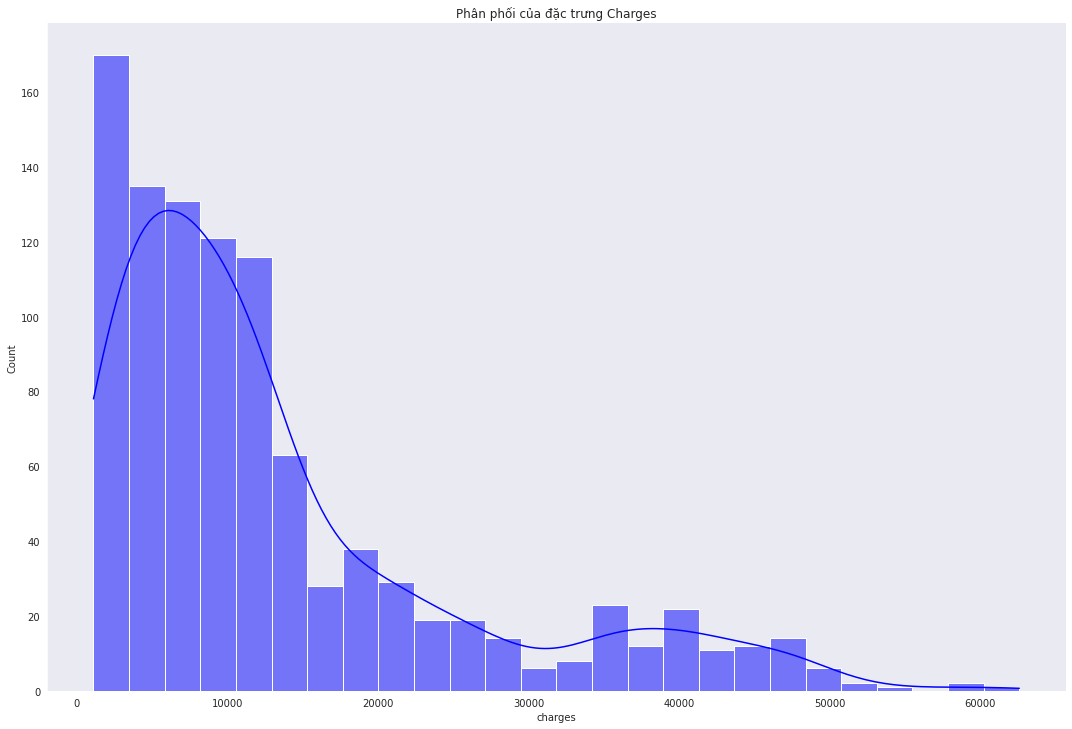

In [13]:
# Trực quan hóa phân bố dữ liệu chi phí y tế
sns.set_style("dark")
ax = sns.displot(train, x='charges', kde = True, color='b', height=10, aspect=15/10)
plt.title('Phân phối của đặc trưng Charges')
plt.show()

**Nhận xét:** Chi phí trung bình của chi phí y tế lớn hơn rất nhiều so với Giá trị trung vị của chi phí y tế dẫn đến phân phối bị lệch sang một phía (sang trái), chứng tỏ dữ liệu tập trung không đều, do đó cần phải điều chỉnh bằng cách dùng **logarithm**

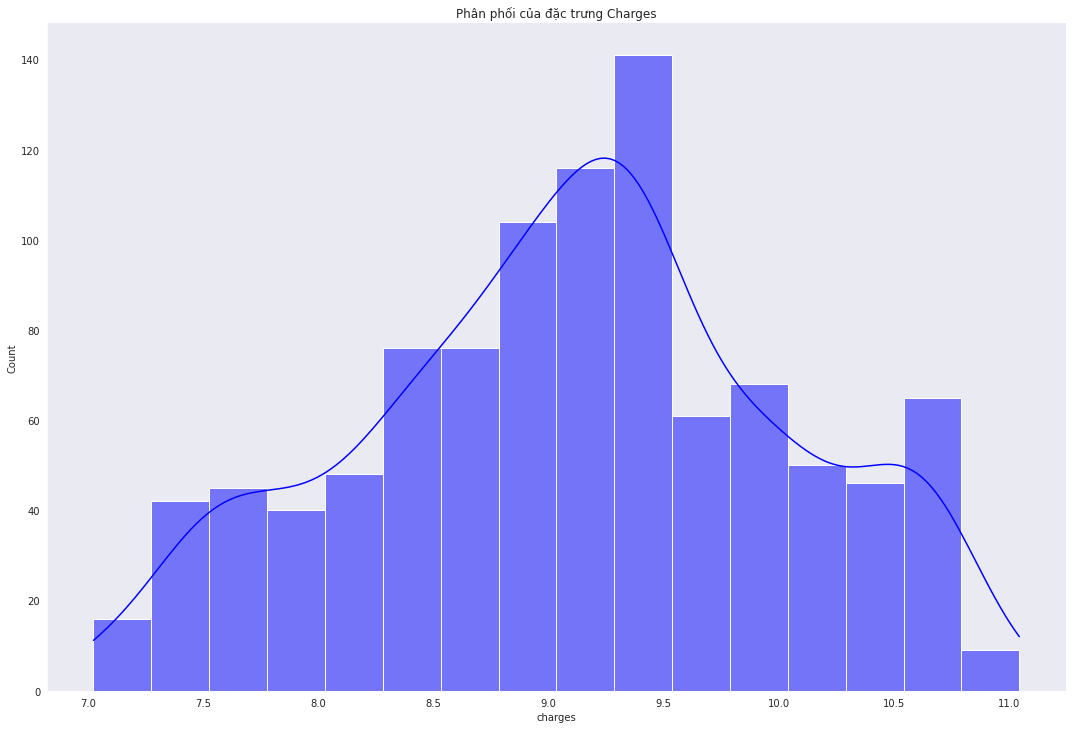

In [14]:
# Trực quan hóa phân bố dữ liệu chi phí y tế nhưng dùng dữ liệu đã chuẩn hóa bằng log
sns.set_style("dark")
ax = sns.displot(np.log(train['charges']), kde = True, color='b', height=10, aspect=15/10)
plt.title('Phân phối của đặc trưng Charges')
plt.show()

**Nhận xét:** Hình dạng biểu đồ sau khi dùng Numpy logarithm có dạng xấp xỉ phân phối chuẩn

## Tương quan giữa các đặc trưng trong dữ liệu

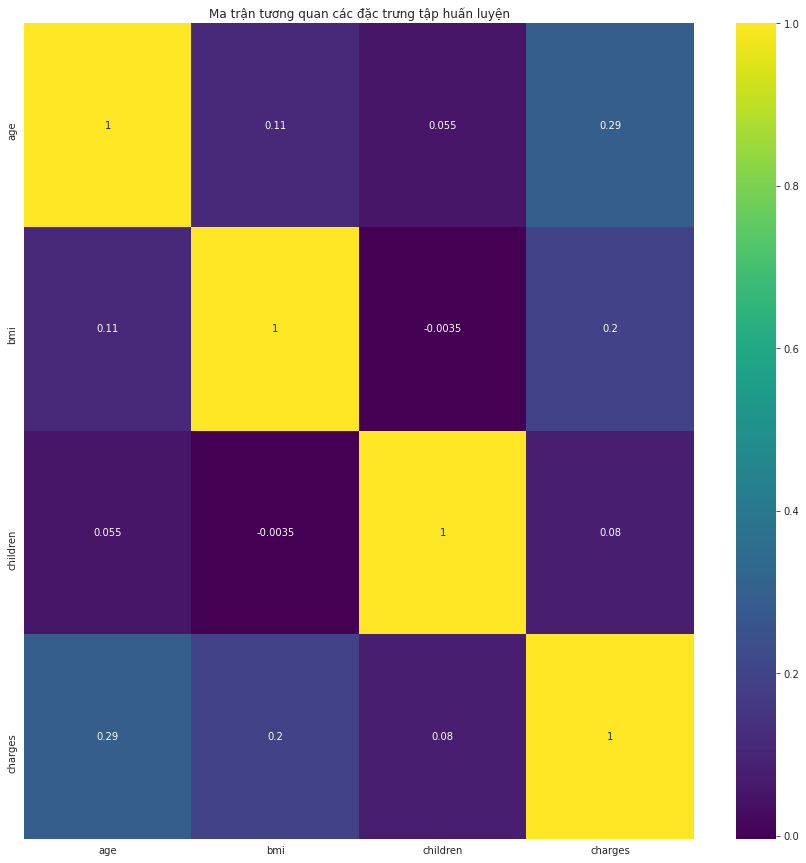

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax = sns.heatmap(train.corr(), annot=True, cmap='viridis')
plt.title('Ma trận tương quan các đặc trưng tập huấn luyện')
plt.show()

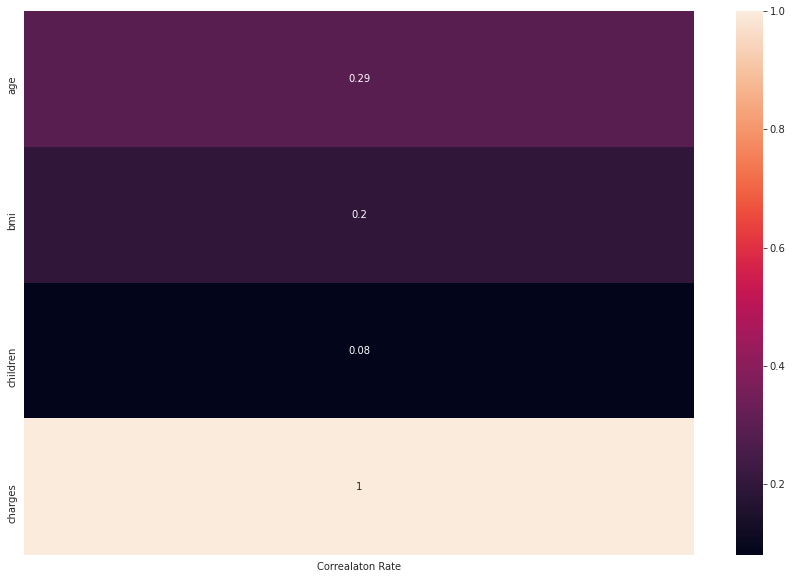

In [16]:
plt.figure(figsize=(15,10))
heatmap_df = pd.DataFrame({'Correalaton Rate':train.corr()['charges'].values}, index = train.corr()['charges'].index)
sns.heatmap(heatmap_df, annot = True)
plt.show()

**Nhận xét:** Giữa các cặp đặc trưng dữ liệu có mối quan hệ tương đối thấp, hệ số tương quan giữa chúng bé hơn 0.5. Điều này chúng ta cần suy đoán, cần phải thêm một số điều kiện khác nữa để rút ra mối quan hệ giữa chúng với chi phí y tế: vùng (Region), tình trạng hút thuốc (Smoker) và số lượng trẻ con/ người phụ thuộc (children)

## Phân tích chi phí y tế dựa trên một số dữ kiện liên quan

### Theo Vùng (Region)
Biểu đồ Bar chart trực quan chi phí y tế theo từng vùng: Northwest, Southwest, Northeast, Southest

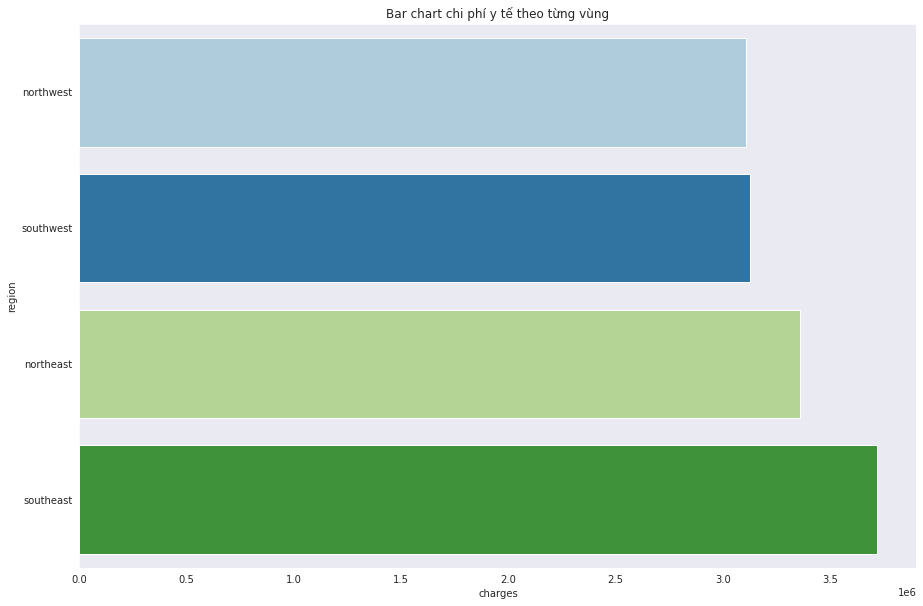

In [17]:
charges = train['charges'].groupby(train.region).sum().sort_values(ascending = True)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax = sns.barplot(x=charges.head(), y=charges.head().index, palette='Paired')
plt.title('Bar chart chi phí y tế theo từng vùng')
plt.show()

**Nhận xét**: Biểu đồ thể hiện chi phí y tế theo từng vùng. Chúng ta có 4 vùng cần xem xét: Northwest (vùng Đông Bắc), Southwest (vùng Tây Bắc), Northeast (vùng Tây Nam) và Southeast (vùng Đông Nam). Trong đó, vùng Tây Nam là vùng có chi phí y tế cao nhất, hai vùng Đông Bắc và Tây Bắc có chi phí y tế thấp hơn các vùng còn lại

### Theo giới tính (Sex) và Vùng (Region)

Biểu đồ Bar Chart trực quan chi phí y tế theo từng vùng: Northwest, Southwest, Northeast, Southest và nhóm giới tính: Nam (Male), Nữ (Female)

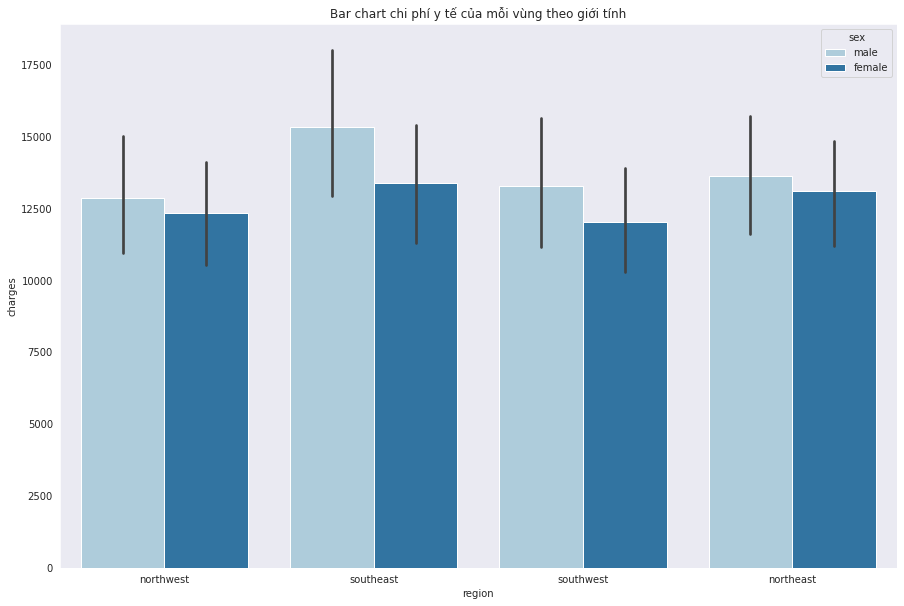

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax = sns.barplot(x='region', y='charges', hue='sex', data=train, palette='Paired')
plt.title('Bar chart chi phí y tế của mỗi vùng theo giới tính')
plt.show()

**Nhận xét**:
- xét viện phí tương đương nhau. chi phí y tế của nam giới cao hơn hẳn so với nữ giới => lượng người khám và chữa bệnh là nam giới nhiều hơn nữ giới. điều này xảy ra ở mọi khu vực và nổi bật hơn ở đông nam và tây nam.

### Theo tình trạng hút thuốc (Smoker) và vùng (Region)
Biểu đồ Bar Chart trực quan chi phí y tế theo từng vùng: Northwest, Southwest, Northeast, Southest phân loại theo tình trạng hút thuốc: yes/no

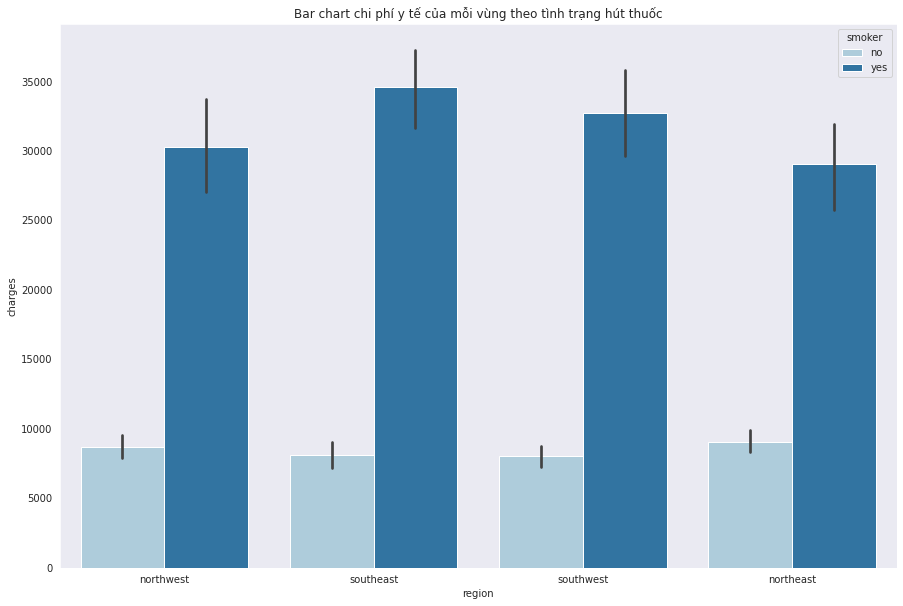

In [19]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax = sns.barplot(x = 'region', y = 'charges', hue='smoker', data=train, palette='Paired')
plt.title('Bar chart chi phí y tế của mỗi vùng theo tình trạng hút thuốc')
plt.show()

**Nhận xét:**
- số lượng người có hút thuốc cao hơn khoảng 3 lần so với người không hút.
- ở khu vực miền Bắc lượng người hút thuốc thấp hơn so với miền Nam.
- đồng thời ở khu vực miền Bắc lượng người không hút thuốc lớn hơn so với miền Nam.
=> tỉ lệ người không hút thuốc so với hút thuốc ở miền Bắc vượt trội với Miền Nam. 

### Theo số lượng trẻ con/ người phụ thuộc (Children) và Vùng (Region)
Biểu đồ Bar Chart trực quan chi phí y tế theo từng vùng: Northwest, Southwest, Northeast, Southest phân loại theo số lượng trẻ con/ người phụ thuộc

Theo quan sát thống kê mô tả ở trên: số lượng trẻ con/ người phụ thuộc nằm trong khoảng [0, 5]

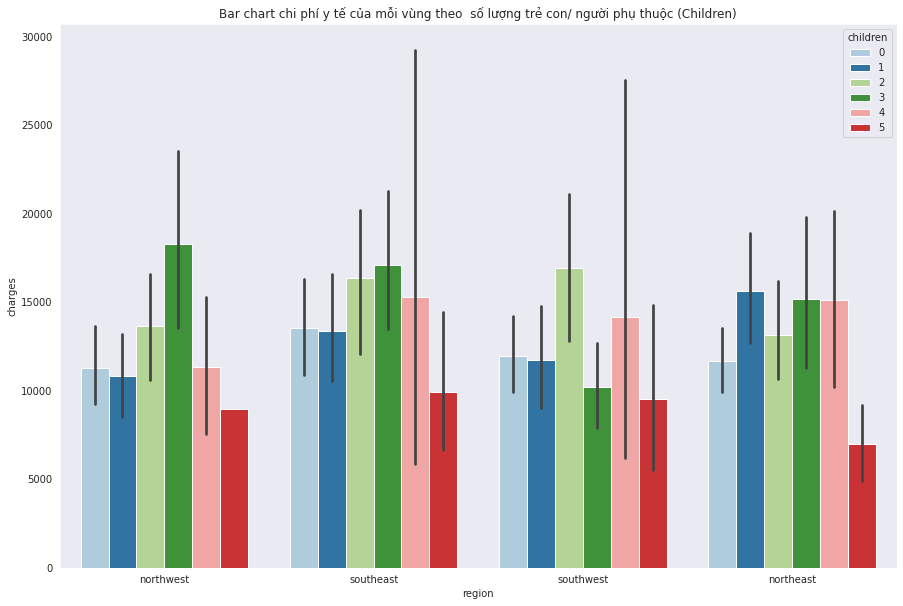

In [20]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax = sns.barplot(x = 'region', y = 'charges', hue='children', data=train, palette='Paired')
plt.title('Bar chart chi phí y tế của mỗi vùng theo  số lượng trẻ con/ người phụ thuộc (Children)')
plt.show()

**Nhận xét:**

- đa phần viện phí ở người có 3 đứa trẻ đứng cao ngoại trừ tây nam.
- viện phí của người có 5 đứa trẻ ở mọi khu vực là thấp nhất.
- viện phí của người không nuôi trẻ tương đối cao ?


In [21]:
print(train.groupby(train.children).mean())

                age        bmi       charges
children                                    
0         37.915294  30.505447  12151.780720
1         40.552846  30.522724  12952.327303
2         39.351955  30.544553  15086.862511
3         41.725000  30.504500  15486.041388
4         38.904762  31.080238  13846.733476
5         34.583333  29.100833   8942.128604


In [22]:
print(train.groupby(train.children).max())

          age   sex    bmi smoker     region      charges
children                                                 
0          64  male  53.13    yes  southwest  62592.87309
1          64  male  50.38    yes  southwest  58571.07448
2          64  male  47.60    yes  southwest  49577.66240
3          64  male  44.70    yes  southwest  60021.39897
4          61  male  41.23    yes  southwest  40182.24600
5          49  male  42.40    yes  southwest  19023.26000


In [23]:
print(train.groupby(train.bmi).mean())

         age  children      charges
bmi                                
15.960  18.0       0.0   1694.79640
16.815  38.0       2.0   6640.54485
17.195  26.0       2.0  14455.64405
17.290  27.5       2.0   9853.71760
17.385  23.0       1.0   2775.19215
...      ...       ...          ...
47.600  37.0       2.0  46113.51100
47.740  52.0       1.0   9748.91060
49.060  58.0       0.0  11381.32540
50.380  23.0       1.0   2438.05520
53.130  18.0       0.0   1163.46270

[484 rows x 3 columns]


### Theo tuổi (Age) và tình trạng hút thuốc (Smoker)

Đồ thị tuyến tính mối quan hệ giữa tuổi (Age) với chi phí y tế (Charges) theo loại của tình trạng hút thuốc (Smoker) [có(yes)/ không(no)]

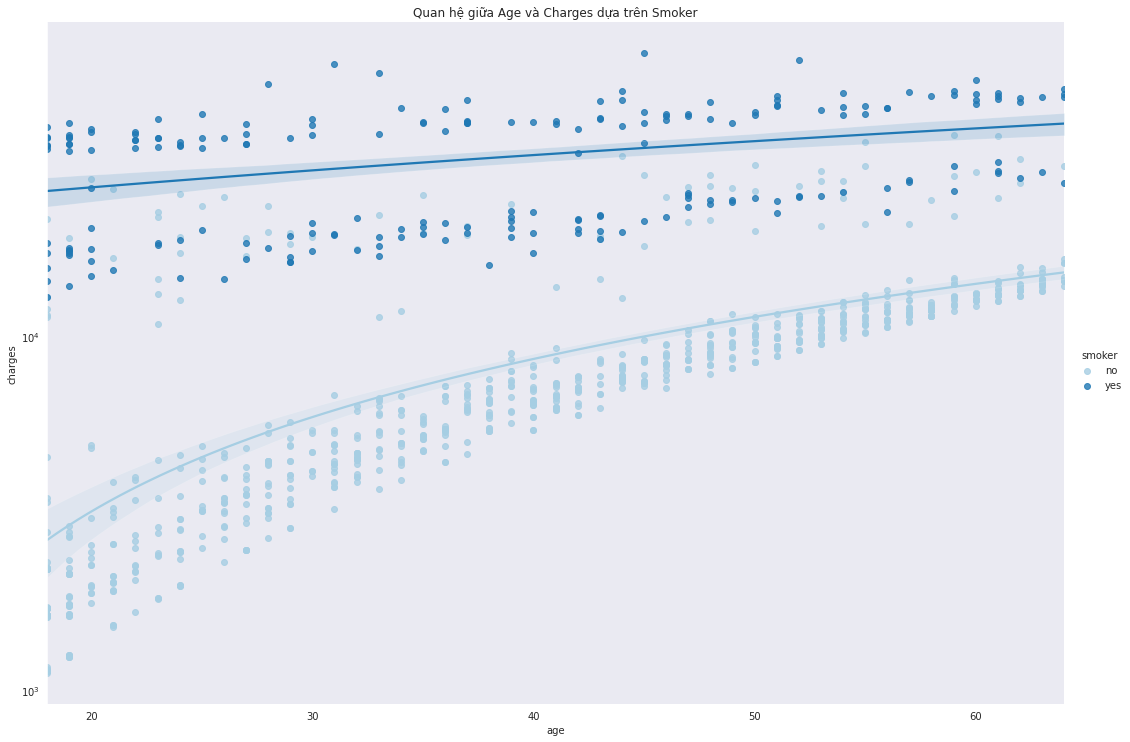

In [24]:
grid = sns.lmplot(x = 'age', y = 'charges', hue='smoker',data=train, palette='Paired', height=10, aspect=15/10)
grid.set(yscale="log")
plt.title('Quan hệ giữa Age và Charges dựa trên Smoker')
plt.show()

**Nhận xét:**

- viện phí của người hút thuốc cao hơn so với người không hút thuốc khoảng 23000.
- viện phí sẽ tăng dần đều theo số tuổi của người bệnh dù có hút thuốc hay không.
=> số tiền viện phí tăng thêm cần bỏ ra khi khám phụ thuộc vào tuổi, hút thuốc sẽ tăng thêm số tiền cố định thay vì tỉ lệ tăng dần.
 

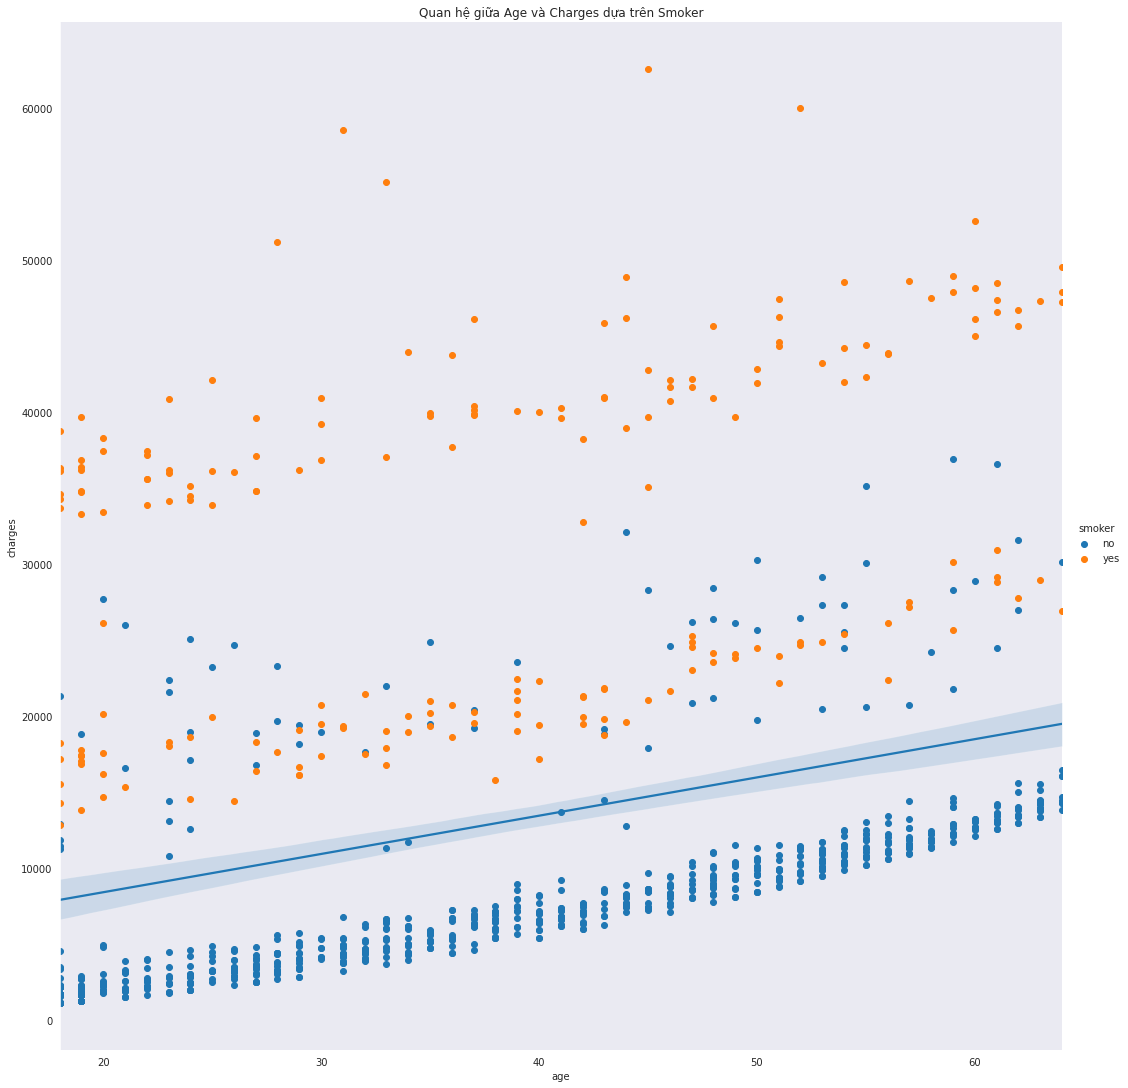

In [25]:
sns.FacetGrid(train, hue="smoker", height=15).map(plt.scatter, "age", "charges").add_legend()
sns.regplot(x="age", y="charges", data=train, scatter=False,)
plt.title('Quan hệ giữa Age và Charges dựa trên Smoker')
plt.show()

### Theo chỉ số BMI (bmi) và tình trạng hút thuốc
Đồ thị tuyến tính mối quan hệ giữa chỉ số BMI (bmi) với chi phí y tế (Charges) theo loại của tình trạng hút thuốc (Smoker) [có(yes)/ không(no)]

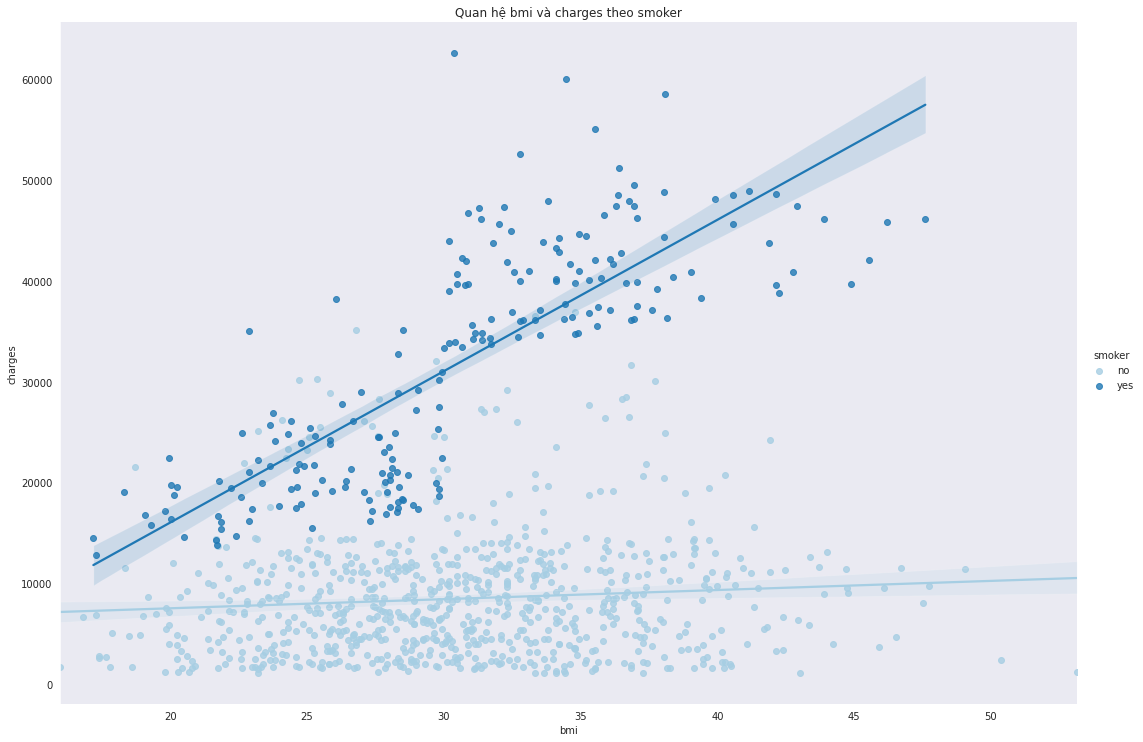

In [26]:
grid = sns.lmplot(x = 'bmi', y = 'charges', hue='smoker', data=train, palette='Paired', height=10, aspect=15/10)
#grid.set(yscale='log')
plt.title('Quan hệ bmi và charges theo smoker')
plt.show()

**Nhận xét:**

- biểu đồ cho ta thấy số tiền viện phí khi không hút thuốc sẽ ổn định bất kể số bmi. 
- viện phí của người không hút thuốc tăng với tỉ lệ cực thấp nếu không hút thuốc.
- viện phí của người hút thuốc sẽ tăng cao tỉ lệ thuận với bmi. 
- ở người hút thuốc tỉ lệ người có bmi thấp cao hơn so với ở người không hút. 


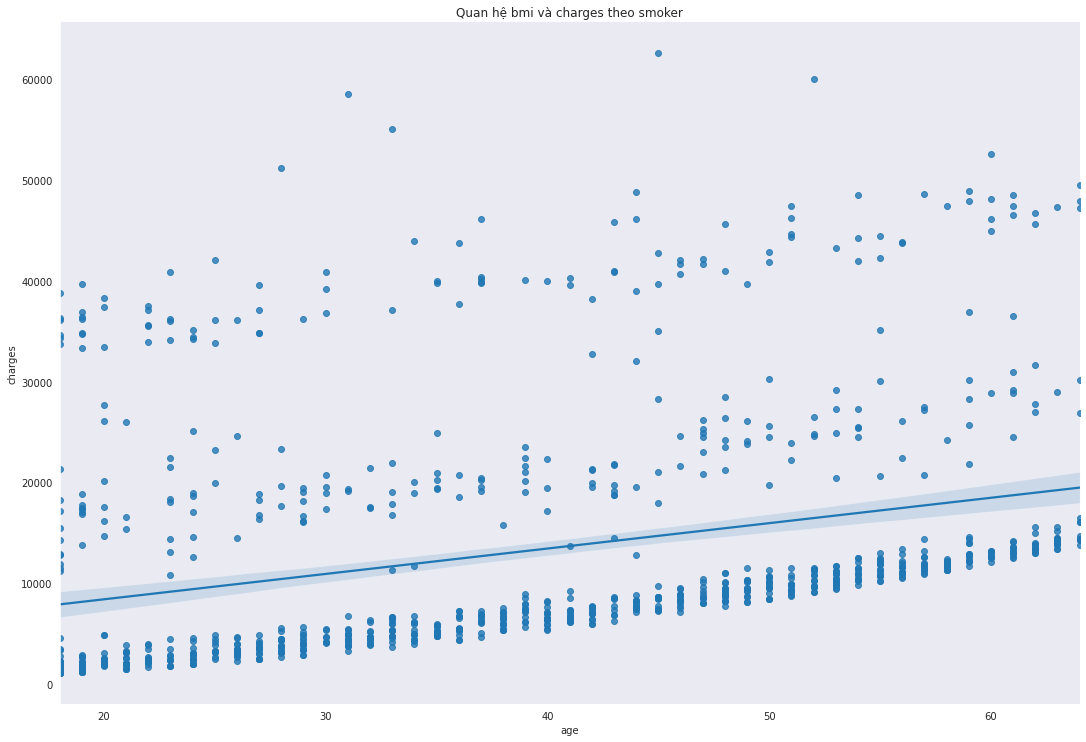

In [27]:
sns.lmplot(x = 'age', y = 'charges', data=train, palette='Paired', height=10, aspect=15/10)
plt.title('Quan hệ bmi và charges theo smoker')
plt.show()

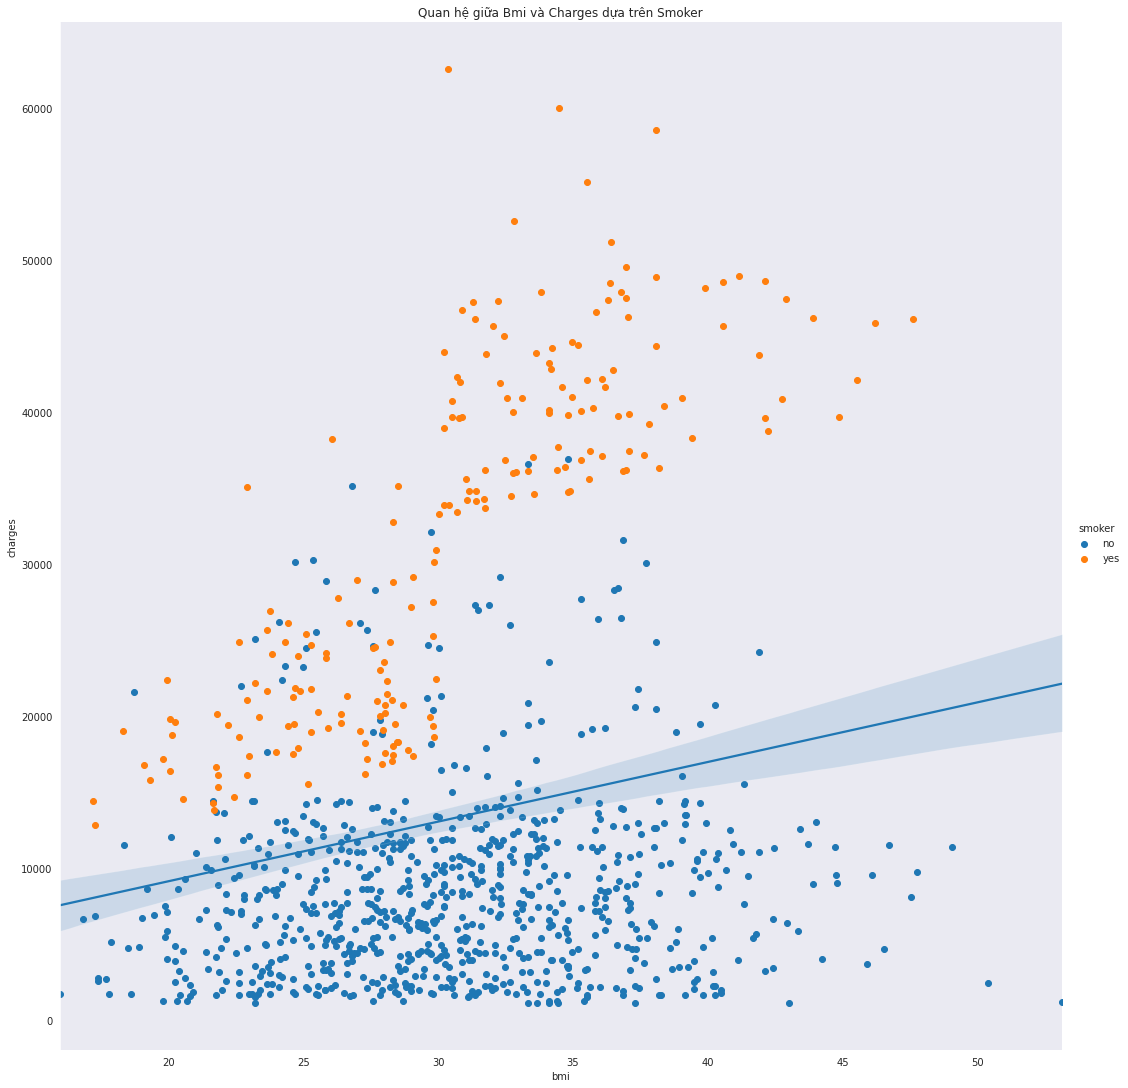

In [28]:
sns.FacetGrid(train, hue="smoker", height=15).map(plt.scatter, "bmi", "charges").add_legend()
sns.regplot(x="bmi", y="charges", data=train, scatter=False,)
plt.title('Quan hệ giữa Bmi và Charges dựa trên Smoker')
plt.show()

**Nhận xét:**


- người có bmi cao sẽ phải trả nhiều tiền viện phí hơn so với bmi thấp.
- người hút thuốc thường có bmi thấp và viện phí cao hơn người không hút.

### Theo số lượng trẻ con/ người phụ thuộc (Children) và tình trạng hút thuốc

Đồ thị tuyến tính mối quan hệ giữa số lượng trẻ con/ người phụ thuộc (Children) với chi phí y tế (Charges) theo loại của tình trạng hút thuốc (Smoker) [có(yes)/ không(no)]

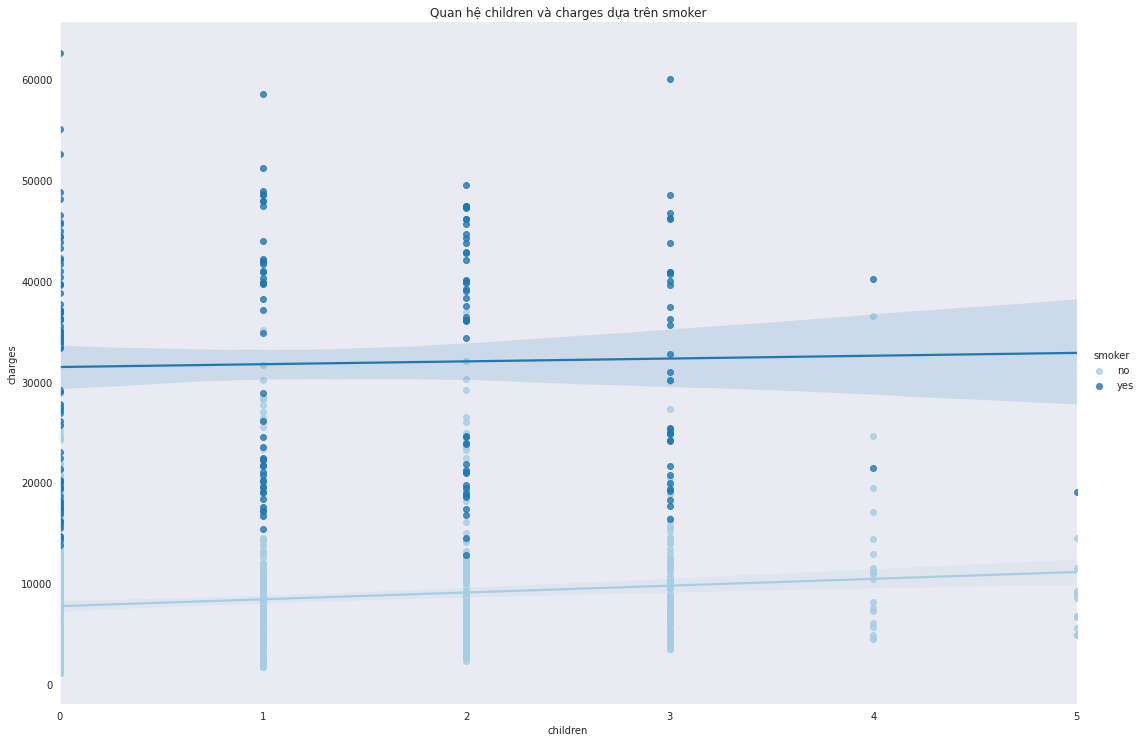

In [29]:
grid = sns.lmplot(x = 'children', y = 'charges', hue='smoker', data=train, palette='Paired', height=10, aspect=15/10)
#grid.set(yscale='log')
plt.title('Quan hệ children và charges dựa trên smoker')
plt.show()

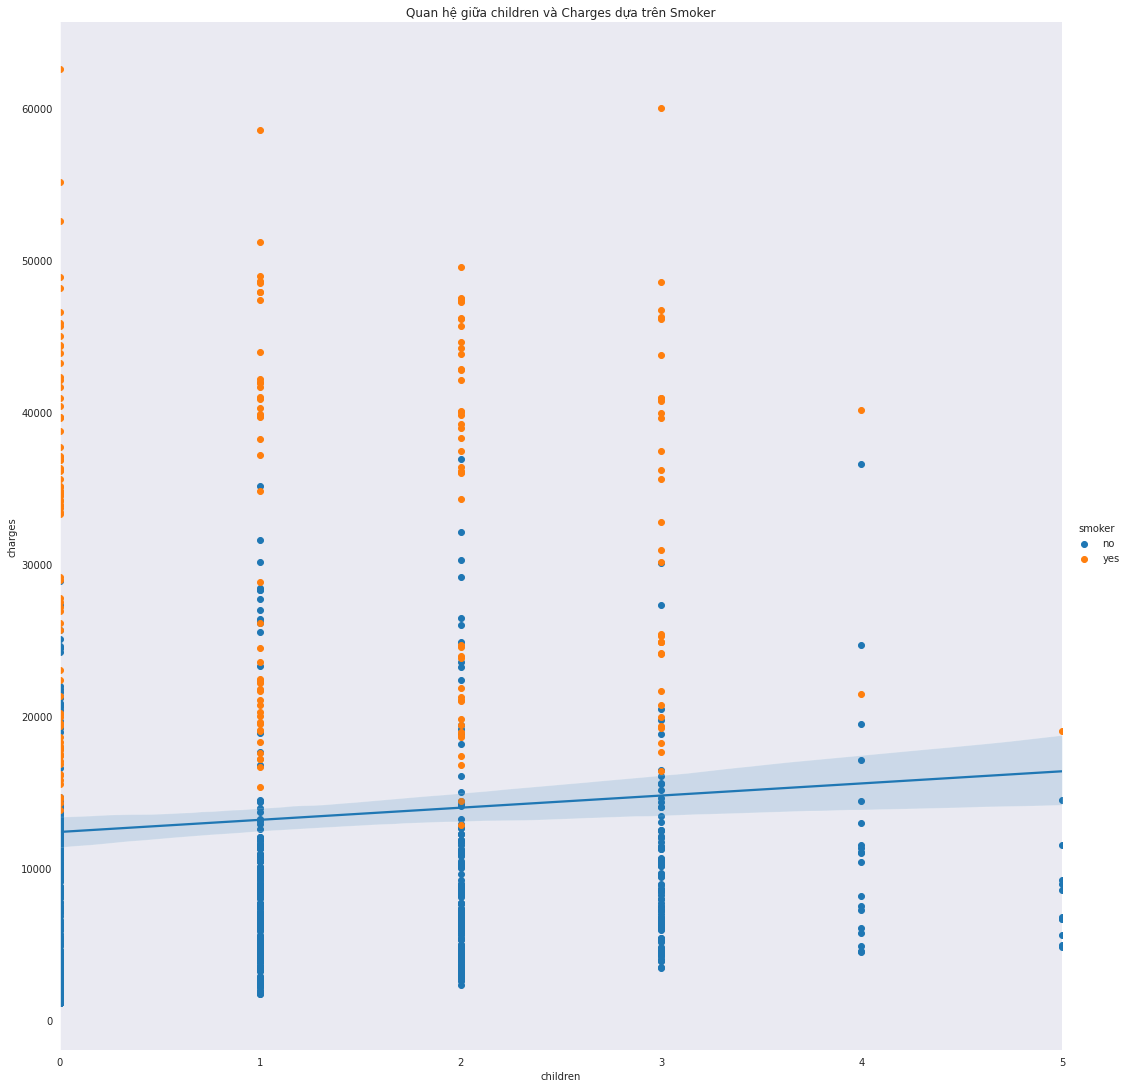

In [30]:
sns.FacetGrid(train, hue="smoker", height=15).map(plt.scatter, "children", "charges").add_legend()
sns.regplot(x="children", y="charges", data=train, scatter=False,)
plt.title('Quan hệ giữa children và Charges dựa trên Smoker')
plt.show()

**nhận xét:**

- người có càng nhiều đứa trẻ lại tỉ lệ hút thuốc càng thấp.
- viện phí ở người có 2-3 đứa trẻ là cao nhất.

## Xử lý dữ liệu

In [31]:
# Xem kiểu dữ liệu tập huấn luyện
train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [32]:
train.sex.value_counts()

male      506
female    497
Name: sex, dtype: int64

In [33]:
train.smoker.value_counts()

no     797
yes    206
Name: smoker, dtype: int64

In [34]:
train.region.value_counts()

southeast    259
northeast    251
southwest    247
northwest    246
Name: region, dtype: int64

In [35]:
# Thay thế [female, male] trong cột sex thành dạng nhị phân [0, 1]
train['sex'] = train['sex'].astype('category').cat.codes

# Thay thế [yes, no] trong cột smoker thành dạng nhị phân [1, 0]
train['smoker'] = train['smoker'].astype('category').cat.codes

# Thay thế [southeast, northeast, southwest, northwest] -> [0, 1, 2, 3]
train['region'] = train['region'].astype('category').cat.codes

# Thay thế [female, male] trong cột sex thành dạng nhị phân [0, 1]
test['sex'] = test['sex'].astype('category').cat.codes

# Thay thế [yes, no] trong cột smoker thành dạng nhị phân [1, 0]
test['smoker'] = test['smoker'].astype('category').cat.codes

# Thay thế [southeast, northeast, southwest, northwest] -> [0, 1, 2, 3]
test['region'] = test['region'].astype('category').cat.codes

In [36]:
# Xem kiểu dữ liệu tập huấn luyện
train.dtypes

age           int64
sex            int8
bmi         float64
children      int64
smoker         int8
region         int8
charges     float64
dtype: object

In [37]:
# Xem kiểu dữ liệu tập huấn luyện
train.head()

,age,sex,bmi,children,smoker,region,charges
0,24,1,23.655,0,0,1,2352.96845
1,28,0,26.510,2,0,2,4340.44090
2,51,1,39.700,1,0,3,9391.34600
3,47,1,36.080,1,1,2,42211.13820
4,46,0,28.900,2,0,3,8823.27900


In [38]:
test.head()

,age,sex,bmi,children,smoker,region,charges
0,45,0,25.175,2,0,0,9095.06825
1,36,0,30.020,0,0,1,5272.17580
2,64,0,26.885,0,1,1,29330.98315
3,46,1,25.745,3,0,1,9301.89355
4,19,1,31.920,0,1,1,33750.29180


# Lựa chọn mô hình Máy học cho bài toán

Vấn đề đặt ra, dựa trên những dự kiện (các biến, giả định rằng các biến này độc lập với nhau) về tuổi (age), giới tính (sex), bmi, số lượng trẻ em (children), vùng dân cư (region), ta có thể đưa ra dự đoán về giá trị của chi phí y tế cá nhân (biến phụ thuộc) một cách chính xác nhất có thể
	
Đây là một bài toán có thể áp dụng Mô hình Tuyến tính và Phân tích Hồi quy

# Cài đặt mô hình Máy học


## Cài đặt thuật toán Linear Regression

In [39]:
# Chuẩn bị dữ liệu
x_train = train.drop(['charges'], axis=1)
x_test = test.drop(['charges'], axis = 1)
y_train = train['charges']
y_test = test['charges']
print("Train features shape : ", x_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", x_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (1003, 6)
Train target shape   :  (1003,)
Test features shape  :  (335, 6)
Test target shape    :  (335,)


In [40]:
# Mô hình hồi quy tuyến tính
Lin_reg = LinearRegression(fit_intercept=True)
Lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# Hệ số của các đặc trưng, hệ số chặn trong mô hình regression của dữ liệu, điểm số trên tập test
print('Linear regression intercept = ', Lin_reg.intercept_) # hệ số bậc 0
print('Linear regression coefficient = ', Lin_reg.coef_) # hệ số bậc 1
print('Linear regression score on test data = ', Lin_reg.score(x_test, y_test)) #: phương sai

Linear regression intercept =  -12117.149214175606
Linear regression coefficient =  [  259.870936      48.14518497   337.05864381   427.52339986
 23622.50371905  -299.04523816]
Linear regression score on test data =  0.7668905583460909


In [42]:
# Hệ số của các đặc trưng
for i in range(len(x_train.columns)):
    print(train.columns[i], ": ", Lin_reg.coef_[i])

age :  259.87093600053163
sex :  48.145184967129666
bmi :  337.05864381456627
children :  427.5233998551999
smoker :  23622.503719045195
region :  -299.04523815748104


In [43]:
# Test trên tập huấn luyện
y_train_pred = Lin_reg.predict(x_train)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  6083.690704100102
R2:  0.7449087316606229


In [44]:
# Predict
X_test = test.drop(['charges'], axis = 1)
y_test = test['charges']
y_pred = Lin_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (np.sqrt(mse))
mv = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

output = pd.DataFrame(y_test[0:10])
output['Predicted'] = y_pred[0:10]
output['Difference'] = output['Predicted'] - output['charges']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print("Mean Absolute Error is", round(mae,1))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("Variance explained by model", round(mv*100,5), "%")

       charges     Predicted   Difference
0   9095.06825   8917.541064  -177.527186
1   5272.17580   7057.659731  1785.483931
2  29330.98315  36899.870810  7568.887660
3   9301.89355   9546.158773   244.265223
4  33750.29180  26950.914146 -6799.377654
5   4536.25900  10756.811300  6220.552300
6   2117.33885    110.228697 -2007.110153
7  14210.53595  17039.898530  2829.362580
8   3732.62510    986.980945 -2745.644155
9  10264.44210  11318.409287  1053.967187 

Model testing performance:
--------------------------
Mean Absolute Error is 4252.9
RMSE is 5930.779824530081
R2 score is 0.7668905583460909
Variance explained by model 76.6909 %


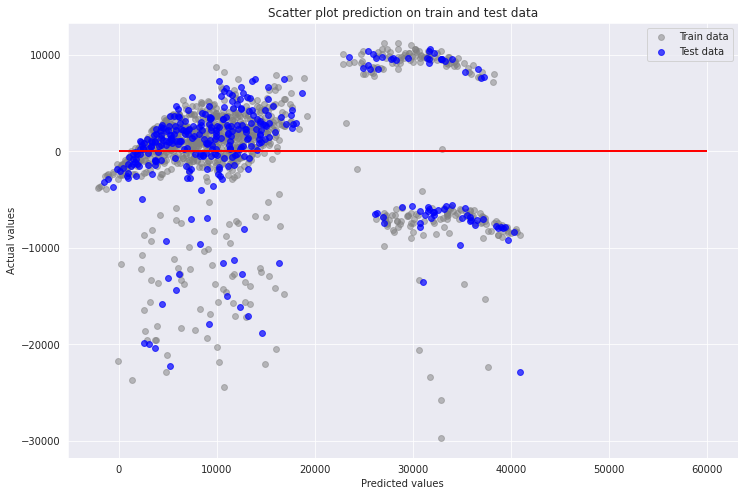

In [45]:
# plotting
plt.figure(figsize=(12,8))

plt.scatter(y_train_pred, y_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_pred, y_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.title('Scatter plot prediction on train and test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.grid()
plt.show()

## Nhận xét về Linear Regression

1.   dựa vào bộ train data, Linear Regression tính toán với bình phương phương sai thấp nhất của dữ liệu so với dữ liệu cần dự đoán, từ đó tìm hệ số slope của mỗi dữ liệu đối với kết quả cần được dự đoán (coefficient). từ đó tìm ra được chi phí phù hợp khi từng loại dữ liệu được đặt ra.
2.   công thức Linear Regression:
 predict = intercept + slopeAge * dataAge + slopeSex * dataSex + slopeBMI * dataBMI + ...




## Cài đặt thuật toán Ridge Regression

In [46]:
# Chuẩn hóa dữ liệu
# Chia tập huấn luyện, tập test
x_train = train.drop(['charges'], axis = 1)
x_test = test.drop(['charges'], axis = 1)
y_train = train['charges']
y_test = test['charges']
print("Train features shape : ", x_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", x_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (1003, 6)
Train target shape   :  (1003,)
Test features shape  :  (335, 6)
Test target shape    :  (335,)


0.09236708571873885


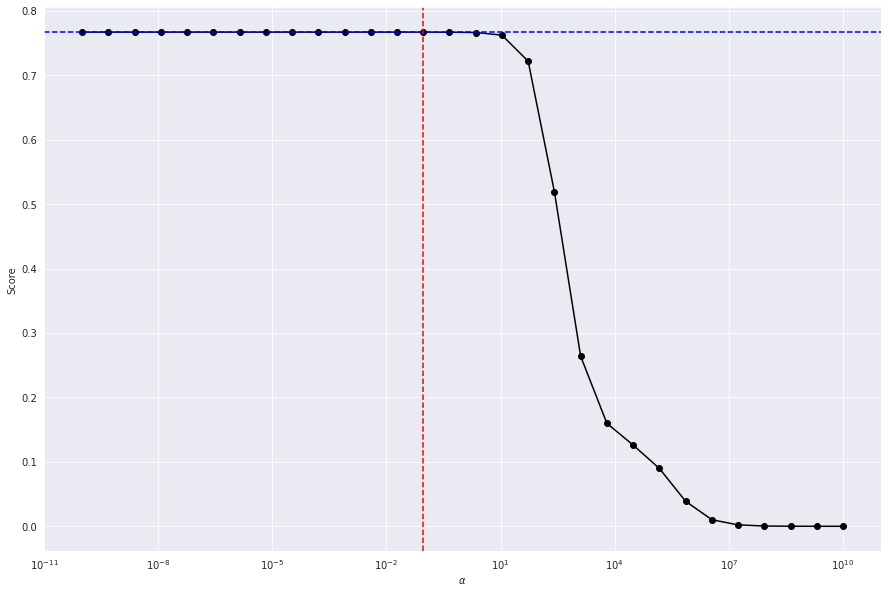

In [47]:
# Khởi tạo dãy alphas
alphas = np.logspace(-10, 10, 30)

# Khởi tạo mô hình RidgeCV lựa chọn alpha tối ưu
scores = np.empty_like(alphas)

for i,a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha=a)
    ridge.fit(x_train, y_train)
    scores[i] = ridge.score(x_test, y_test) 

model = RidgeCV(alphas=alphas)
model.fit(x_train, y_train)
model_score = model.score(x_test, y_test)
alpha = model.alpha_
print(alpha)

plt.figure(figsize=(15,10))
fig = plt.plot(alphas, scores, '-ko')

ax = plt.axhline(model_score , color='b', ls='--')
ax = plt.axvline(alpha , color='r', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
plt.grid()
plt.show()

In [48]:
# Khởi tạo mô hình hồi quy Ridge
ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.09236708571873885, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
# Hệ số của các đặc trưng, hệ số chặn trong mô hình Ridge Regression của dữ liệu, điểm số trên tập test
print('Ridge regression intercept = ', ridge_reg.intercept_)
print('Ridge regression coefficient = ', ridge_reg.coef_)
print('Ridge regression score on test data = ', ridge_reg.score(x_test, y_test))

Ridge regression intercept =  -12114.241757353386
Ridge regression coefficient =  [  259.85592452    48.70890942   337.06068882   427.61619642
 23609.11641267  -299.0571944 ]
Ridge regression score on test data =  0.7668685984306147


In [50]:
for i in range(len(x_train.columns)):
    print(train.columns[i], ": ", ridge_reg.coef_[i])

age :  259.85592452134887
sex :  48.708909416456066
bmi :  337.06068881782227
children :  427.61619641981235
smoker :  23609.11641266553
region :  -299.05719440491214


In [51]:
# Dự đoán trên tập huấn luyện
y_train_pred = ridge_reg.predict(x_train)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  6083.693095759176
R2:  0.7449085310943889


In [52]:
# Thay thế [female, male] trong cột sex thành dạng nhị phân [0, 1]
test['sex'] = test['sex'].astype('category').cat.codes

# Thay thế [yes, no] trong cột smoker thành dạng nhị phân [1, 0]
test['smoker'] = test['smoker'].astype('category').cat.codes

# Thay thế [southeast, northeast, southwest, northwest] -> [0, 1, 2, 3]
test['region'] = test['region'].astype('category').cat.codes

X_actual = test.drop(['charges'], axis = 1)
y_actual = test['charges']
y_pred = ridge_reg.predict(X_actual)
mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
rmse = (np.sqrt(mse))
mv = explained_variance_score(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

output = pd.DataFrame(y_actual[0:10])
output['Predicted'] = y_pred[0:10]
output['Difference'] = output['Predicted'] - output['charges']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print("Mean Absolute Error is", round(mae,1))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("Variance explained by model", round(mv*100,5), "%")

       charges     Predicted   Difference
0   9095.06825   8920.010080  -175.058170
1   5272.17580   7060.076209  1787.900409
2  29330.98315  36888.473249  7557.490099
3   9301.89355   9549.258509   247.364959
4  33750.29180  26940.766123 -6809.525677
5   4536.25900  10759.916749  6223.657749
6   2117.33885    112.885023 -2004.453827
7  14210.53595  17042.474537  2831.938587
8   3732.62510    989.503439 -2743.121661
9  10264.44210  11321.470011  1057.027911 

Model testing performance:
--------------------------
Mean Absolute Error is 4254.0
RMSE is 5931.059170479339
R2 score is 0.7668685984306147
Variance explained by model 76.68871 %


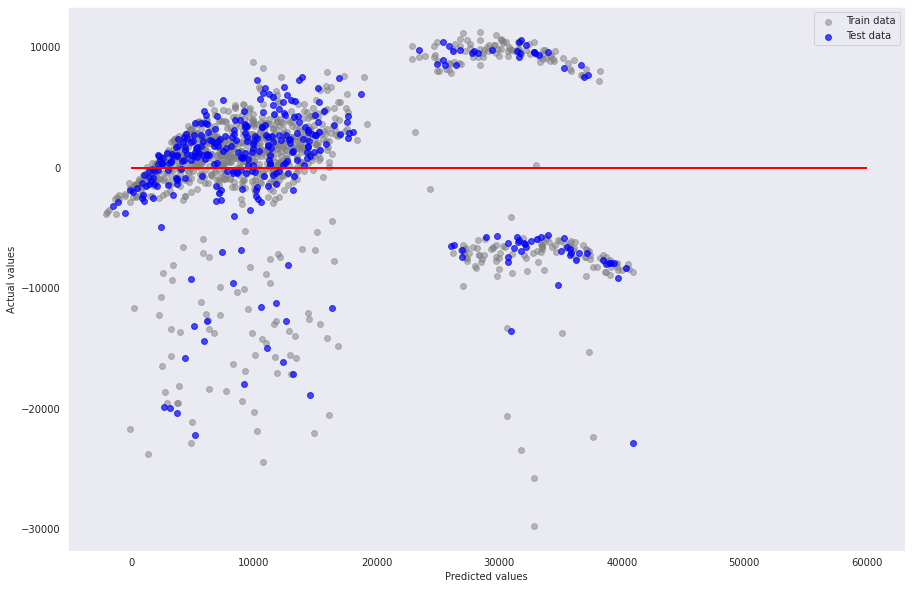

In [53]:
x_train_pred = ridge_reg.predict(x_train)
x_test_pred = ridge_reg.predict(x_test)

plt.figure(figsize=(15,10))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

## Nhận xét về  Ridge Regression

1.   tương tự với Linear Regression, Ridge cũng tìm hệ dữ liệu với phương sai thấp nhất.
2. Ridge tìm ra hệ số bias lớn hơn so với Linear để giảm hoặc tăng tính ảnh hưởng của từng loại dữ liệu lên kết quả được predict.
3. Linear tính toán predict = tổng bình phương phương sai thấp nhất với slope * data.
    
   * Ridge tính toán predict = tổng bình phương phương sai thấp nhất + lambda * slope ^ 2.



## Cài đặt thuật toán Lasso Regression

In [54]:
# Chuẩn bị dữ liệu
x_train = train.drop(['charges'], axis = 1)
x_test = test.drop(['charges'], axis = 1)
y_train = train['charges']
y_test = test['charges']
print("Train features shape : ", x_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", x_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (1003, 6)
Train target shape   :  (1003,)
Test features shape  :  (335, 6)
Test target shape    :  (335,)


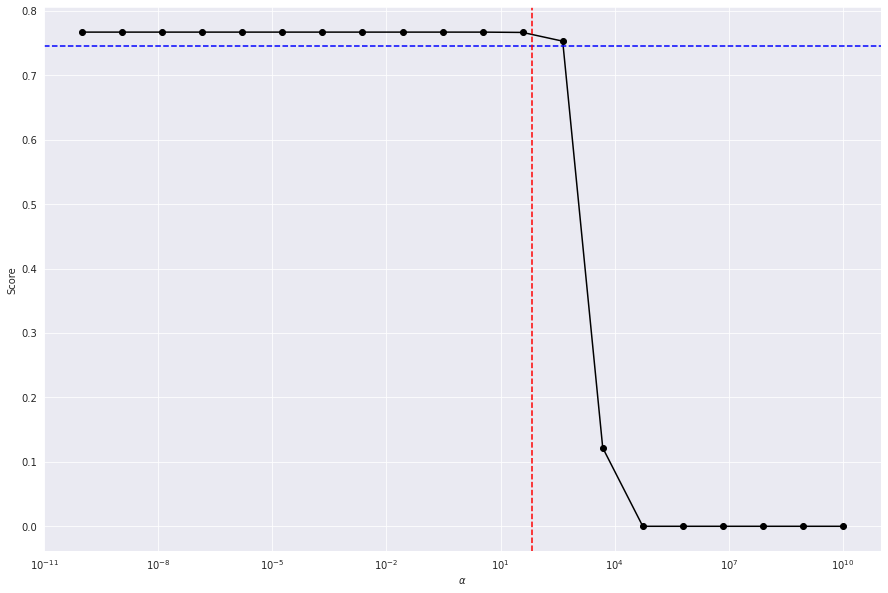

In [55]:
# Chọn alpha
alphas = np.logspace(-10, 10, 20)
scores = np.empty_like(alphas)

for i,a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    scores[i] = lasso.score(x_test, y_test) 

lassocv = LassoCV()
lassocv.fit(x_train, y_train)
lassocv_score = lassocv.score(x_train, y_train)
lassocv_alpha = lassocv.alpha_

plt.figure(figsize=(15,10))
fig = plt.plot(alphas, scores, '-ko')

ax = plt.axhline(lassocv_score, color='b', ls='--')
ax = plt.axvline(lassocv_alpha, color='r', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
plt.grid()
plt.show()

In [56]:
lassocv_alpha

65.56386221649441

In [57]:
# Khởi tạo mô hình
lasso = Lasso(alpha=np.log(lassocv_alpha), fit_intercept=True, normalize=True)

In [58]:
# Khớp dữ liệu tập huấn luyện
lasso.fit(x_train, y_train)

# Hệ số của các đặc trưng, hệ số chặn trong mô hình regression của dữ liệu, điểm số trên tập test
print(lasso.intercept_)
print(lasso.coef_)
print(lasso.score(x_test, y_test))

-11055.20979138578
[  251.55656277     0.           312.72687677   329.08147159
 23297.2710673   -161.30281036]
0.7655859709489701


In [59]:
# Hệ số của các đặc trưng
for i in range(len(x_train.columns)):
    print(train.columns[i], ": ", lasso.coef_[i])

age :  251.55656277261298
sex :  0.0
bmi :  312.726876768391
children :  329.0814715941892
smoker :  23297.271067297155
region :  -161.3028103621122


In [60]:
# Dự đoán trên tập huấn luyện
y_train_pred = lasso.predict(x_train)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  6091.013493085486
R2:  0.7442942678946298


In [61]:
# Dự đoán
X_actual = test.drop(['charges'], axis = 1)
y_actual = test['charges']
y_pred = lasso.predict(X_actual)
mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
rmse = (np.sqrt(mse))
mv = explained_variance_score(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

output = pd.DataFrame(y_actual[0:10])
output['Predicted'] = y_pred[0:10]
output['Difference'] = output['Predicted'] - output['charges']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print("Mean Absolute Error is", round(mae,1))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("Variance explained by model", round(mv*100,5), "%")

       charges     Predicted   Difference
0   9095.06825   8795.897599  -299.170651
1   5272.17580   7227.584499  1955.408699
2  29330.98315  36588.040565  7257.057415
3   9301.89355   9393.487143    91.593593
4  33750.29180  26842.575065 -6907.716735
5   4536.25900  10758.869397  6222.610397
6   2117.33885    604.107721 -1513.231129
7  14210.53595  16737.019680  2526.483730
8   3732.62510   1395.421666 -2337.203434
9  10264.44210  11069.137483   804.695383 

Model testing performance:
--------------------------
Mean Absolute Error is 4250.1
RMSE is 5947.352352622871
R2 score is 0.7655859709489702
Variance explained by model 76.56042 %


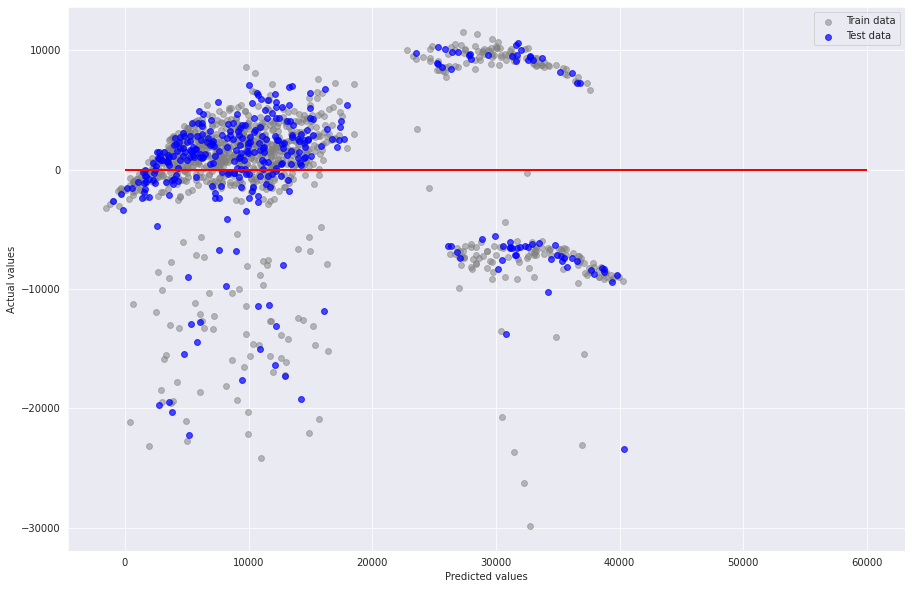

In [62]:
# Trực quan train data, test data giữa giá tri dự đoán và giá trị thực sự
x_train_pred = lasso.predict(x_train)
x_test_pred = lasso.predict(x_test)

plt.figure(figsize=(15,10))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.grid()
plt.show()

## Nhận xét về Lasso Regression

1.   tương tự với Ridge Regression, Lasso cũng tìm hệ dữ liệu với phương sai thấp nhất.
3. Ridge tính toán predict = tổng bình phương phương sai thấp nhất với sai số là lambda * slope^2 .
    
   * Ridge tính toán predict = tổng bình phương phương sai thấp nhất + lambda * |slope|.



## Cài đặt thuật toán Random Forest Regressor

In [63]:
# Chuẩn bị dữ liệu
X_train = train.drop(['charges'], axis=1)
y_train = train.charges
X_test = test.drop(['charges'], axis = 1)
y_test = test['charges']

In [64]:
# Khởi tạo mô hình và khớp dữ liệu trên tập huấn luyện
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [65]:
# Dự đoán trên tập huấn luyện
y_train_pred = rf_regressor.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  1870.7046036122138
R2:  0.9758803072907702


In [66]:
# Điểm số của các đặc trưng: con số này đại diện cho mức độ quan trọng của đặc trưng, càng gần 1 thì đóng góp của nó càng lớn
rf_regressor.feature_importances_

array([0.13747598, 0.00652628, 0.20704556, 0.0209243 , 0.61377244,
       0.01425546])

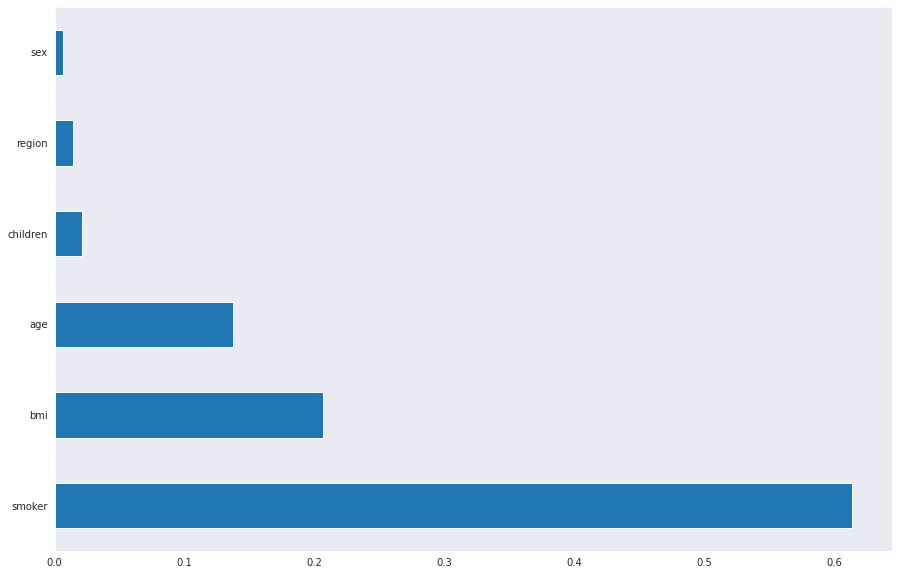

In [67]:
# Trực quan hóa điểm số của các đặc trưng thông quan biểu đồ cột
feat_importances = pd.Series(rf_regressor.feature_importances_, index=X_train.columns)
feat_importances.nlargest(6).plot(kind='barh', figsize=(15, 10))
plt.show()

In [68]:
# Dự đoán và đánh giá mô hình
y_pred_test = rf_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = (np.sqrt(mse))
mv = explained_variance_score(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

output = pd.DataFrame(y_test[0:10])
output['Predicted'] = y_pred_test[0:10]
output['Difference'] = output['Predicted'] - output['charges']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print("Mean Absolute Error is", round(mae,1))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("Variance explained by model", round(mv*100,5), "%")

       charges     Predicted   Difference
0   9095.06825  11224.637848  2129.569598
1   5272.17580   5291.448216    19.272416
2  29330.98315  28469.737721  -861.245429
3   9301.89355   9798.178087   496.284537
4  33750.29180  34589.942880   839.651080
5   4536.25900   7823.426584  3287.167584
6   2117.33885   2137.934333    20.595483
7  14210.53595  14482.122172   271.586222
8   3732.62510   6085.678795  2353.053695
9  10264.44210  11215.945321   951.503221 

Model testing performance:
--------------------------
Mean Absolute Error is 2601.5
RMSE is 4798.365892312577
R2 score is 0.8474110853586974
Variance explained by model 84.80841 %


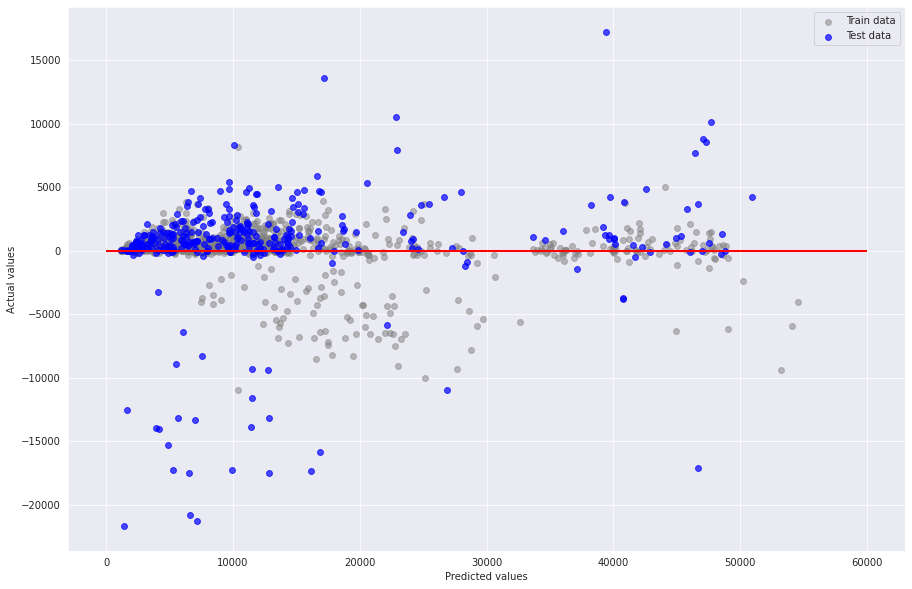

In [69]:
# Trực quan train data, test data giữa giá tri dự đoán và giá trị thực sự
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
ax = plt.scatter(y_train_pred, y_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
ax = plt.scatter(y_pred_test, y_pred_test - y_actual,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.grid()
plt.show()

## Nhận xét về Random Forest Regressor

các bước thực hiện RFR
1.   tạo ra bộ dữ liệu bootstrapped để 1 phần dữ liệu train.


*   Tạo bộ cây quyết định bằng bộ dữ liệu bootstrapped tỉ lệ 1-1.
2. bộ dữ liệu trên được xem là random forest.
3. phần dữ liệu còn lại của bộ train được sử dụng để tính độ chính xác của rừng cây.


*   bằng cách cho những bộ dữ liệu đi qua từng bootstrap ( rừng bootstrap) ta có thể tính được tỉ lệ đúng sai của rừng cây đó.

4. sau khi tính được độ đúng sai của rừng. chúng ta quay lại bước 1 và tạo ra những rừng cây mới với cấu trúc khác.

5. so sánh độ đúng sai của những rừng cây được tạo ra và chọn rừng cây phù hợp nhất.



## Cài đặt thuật toán Polynomial Regression

In [70]:
# Training data
X_train = train.drop(['charges'], axis=1)
y_train = train.charges

In [71]:
# Test data
X_test = test.drop(['charges'], axis=1)
y_test = test.charges

In [72]:
# Shape X training data
X_train.shape

(1003, 6)

In [73]:
# Shape y training data
y_train.shape

(1003,)

In [74]:
# Chọn bậc tối ưu
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

Best degree 2 with RMSE 4655.826842775062


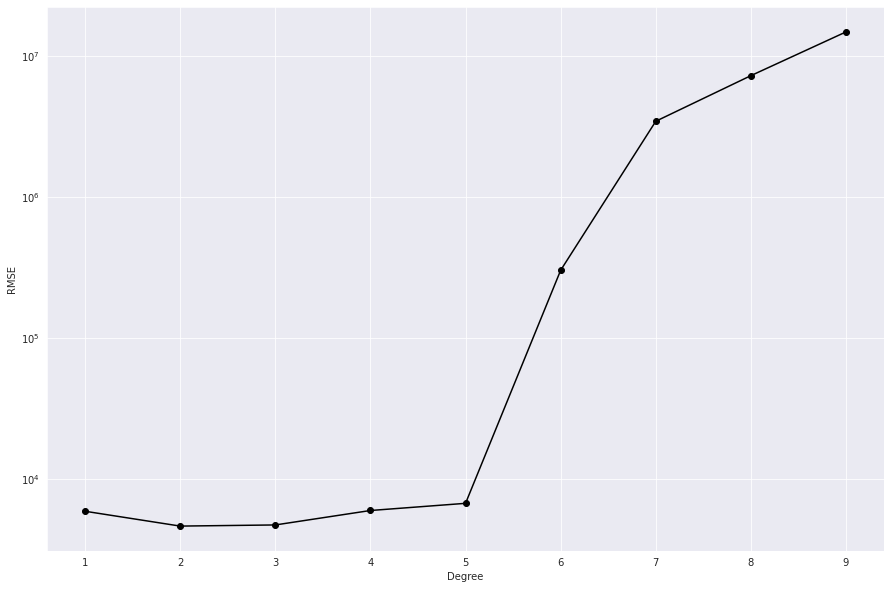

In [75]:
# Plotting choose degree
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.plot(degrees, rmses, '-ko')
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.grid()
plt.show()

In [76]:
# Assigment best degree that calculated
nb_degree = min_deg
poly_features = PolynomialFeatures(degree=nb_degree)
x_poly_train = poly_features.fit_transform(X_train)

# Train features
poly_reg = LinearRegression()
poly_reg.fit(x_poly_train, y_train)

# define and train a model
print('Polynomial intercept = ', poly_reg.intercept_)
print('Polynomial coefficient = ', poly_reg.coef_)
print('Polynomial score on test data = ', poly_reg.score(poly_features.fit_transform(X_test), y_test))

Polynomial intercept =  -1950.6209393671652
Polynomial coefficient =  [-1.32396661e+02 -1.21887049e+03  4.65329018e+02  9.21019394e+02
 -1.03523968e+04 -1.89775082e+02  3.92246073e+00  1.30837777e+01
  1.72528893e+00 -1.42801840e+00  3.65249757e-01  1.87324534e+01
 -1.21887049e+03  4.66712616e+01 -2.81486009e+02  3.68327846e+02
  1.93157215e+02 -7.91039124e+00  1.81728526e+01  1.44710638e+03
 -3.89472274e+01 -7.55542305e+01 -4.13365324e+02 -1.95196916e+02
 -1.03523968e+04  3.50830792e+02  9.49447006e+01]
Polynomial score on test data =  0.8563419718855152


In [77]:
# calculate bias and variance
y_train_pred = poly_reg.predict(poly_features.fit_transform(X_train))

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  4777.420632842026
R2:  0.8426929081771336


In [78]:
# Predict
X_actual = test.drop(['charges'], axis = 1)
y_actual = test['charges']
y_pred_test = poly_reg.predict(poly_features.fit_transform(X_actual))
mae = mean_absolute_error(y_actual, y_pred_test)
mse = mean_squared_error(y_actual, y_pred_test)
rmse = (np.sqrt(mse))
mv = explained_variance_score(y_actual, y_pred_test)
r2 = r2_score(y_actual, y_pred_test)

output = pd.DataFrame(y_actual[0:10])
output['Predicted'] = y_pred_test[0:10]
output['Difference'] = output['Predicted'] - output['charges']
print(output, "\n")

print('Model testing performance:')
print('--------------------------')
print('Mean Absolute Error is ', (round(mae,1)))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Variance explained by model is ', round(mv*100,5), '%')

       charges     Predicted   Difference
0   9095.06825  11016.557647  1921.489397
1   5272.17580   6481.834160  1209.658360
2  29330.98315  34035.526060  4704.542910
3   9301.89355  10221.638782   919.745232
4  33750.29180  29514.302129 -4235.989671
5   4536.25900   4484.621863   -51.637137
6   2117.33885   3538.998934  1421.660084
7  14210.53595  16090.142082  1879.606132
8   3732.62510   3933.502569   200.877469
9  10264.44210  11692.742211  1428.300111 

Model testing performance:
--------------------------
Mean Absolute Error is  2776.0
RMSE is 4655.826842775082
R2 score is 0.8563419718855153
Variance explained by model is  85.63976 %


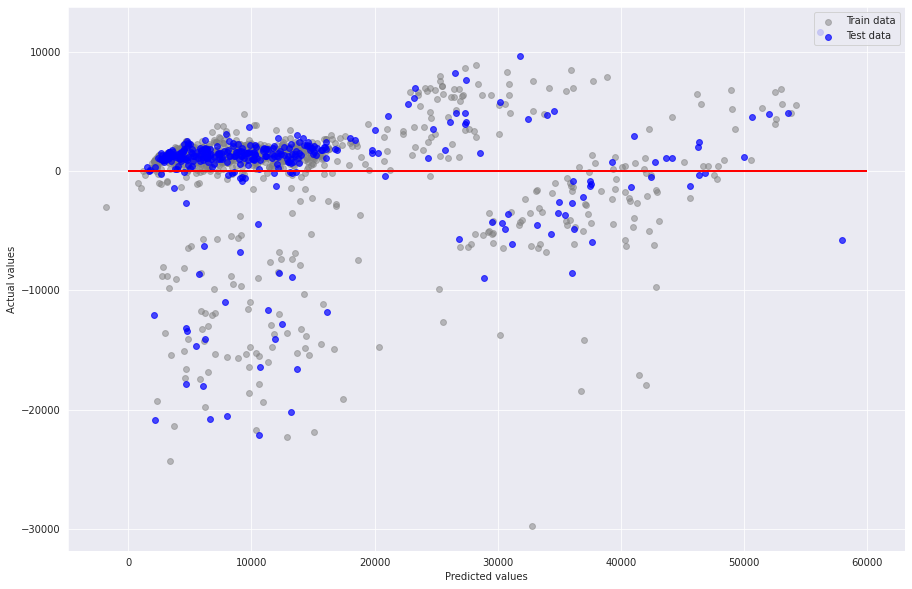

In [79]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
ax = plt.scatter(y_train_pred, y_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
ax = plt.scatter(y_pred_test, y_pred_test - y_actual,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.grid()
plt.show()

## Nhận xét về  Polynomial Regression


1.   Polynomial Regression tiến bộ hơn so với Linear regression.
2.   Polynomial Regression thay đổi giá trị phụ thuộc theo từng data được train và tiến bộ dần với bộ dữ liệu lớn.
3.   Polynomial nhạy cảm với các outlier, tuy nhiên với bộ dữ liệu y tế trên, Polynomial không bị ảnh hưởng nhiều do được phát triển đủ tốt để thực hiện dự đoán với sai số thấp.
4.   công thức chung Polynomial
 Predict = intercept + theta1 * (slopeSex * dataSex + slopeBMI * dataBMI + ... ) + theta2 * ( slopeSex * dataSex + slopeBMI * dataBMI + ... ) + theta3 * ( slopeSex * dataSex + slopeBMI * dataBMI + ... )





# Nhận xét về kết quả dự đoán
 
- thuật toán sẽ dự đoán tốt hơn ở những bộ dữ liệu có chi phí y tế thấp và sai lệch ở những chi phí cao.
- test data được dự đoán với kết quả tốt hơn so với train data.
- những kết quả dự đoán cao sẽ sai lệch khoảng 10000, không dự đoán đúng tuy nhiên độ sai lệch cũng không lớn.